# Credit Risk Modeling

### Business Understanding:
Credit Risk refers to the chance that a customer/borrower will not to be able to make their payments on time.
This can be modeled using various Data Models which train Machine Learning Algorithms using the data acquired from the lender.
The main objective of these models is to predict the probability that a loan will be repaid. 

<strong> Problem Statement: </strong> "If given data about a borrower, how likely is it that the loan taken will be repaid?"

### Data Understanding

The personal details of a borrower that was collected from the lender contains:

- Serious Dlq in 2yrs 
- Revolving Utilization Of Unsecured Lines
- Age
- Number Of Time 30-59 Days Past Due Not Worse 
- Debt Ratio
- Monthly Income
- Number Of Open Credit Lines And Loans 
- Number Of Times 90-Days Late
- Number Real Estate Loans Or Lines 
- Number Of Time 60-89 Days Past Due Not Worse
- Number Of Dependents

Importing the necessary libraries and the data required

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
training_data = pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Credit-Risk-Modelling/data/cs-training.csv")
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Data Cleaning / Data Preparation
Here we are going to clean the data by droping unwanted columns, renaming the columns, dealing with missing data and outliers.

In [4]:
training_data = training_data.drop('Unnamed: 0', axis=1) #removing the index
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Cleaning the column names so that it is easy to access them.

In [6]:
#replacing '-' with '' in column names and converting them to lowercase
cleaned_column = []
for column in training_data.columns:
    cleaned_column.append(column.replace('-','').lower())
training_data.columns=cleaned_column 
training_data.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

Performing some <strong> EDA(Exploratory Data Analysis)</strong> on the data.

In [7]:
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [9]:
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = training_data['seriousdlqin2yrs'].value_counts()*100/total_len
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

Here,

'0' represents the probability of loan being repaid

'1' represents the probabilty of loan payment being delayed 

Using seaborn package we can plot the percentages as barplots.

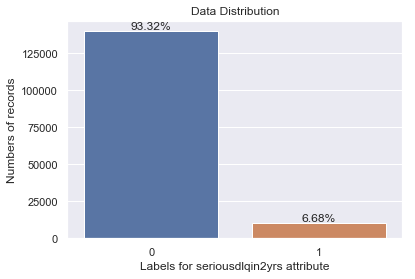

In [10]:
sns.set()
sns.countplot(training_data['seriousdlqin2yrs']).set_title('Data Distribution')
ax = plt.gca()
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x()+x.get_width()/2, x.get_height(),
            '{:.2f}%'.format(100*(height/total_len)),fontsize=12, ha='center', va='bottom')
sns.set(font_scale =1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

Now we check the number of missing values in each column.

In [11]:
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

**Dealing with missing values:** <br/>
We need to deal with the missing values,by replacing it with medain of the column values.

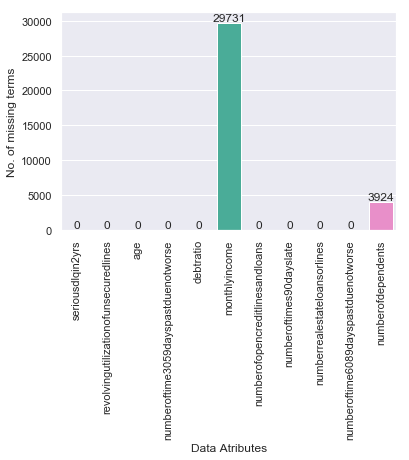

In [12]:
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2, height, int(height),fontsize=12, ha='center', va='bottom')
    
plt.xticks(rotation = 90)
ax.set_xlabel('Data Atributes')
ax.set_ylabel('No. of missing terms')
plt.show()

In [13]:
training_data.fillna((training_data.median()), inplace = True)

The correlation between each feature or attribute with another can be found using the .corr() method. 

In [14]:
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


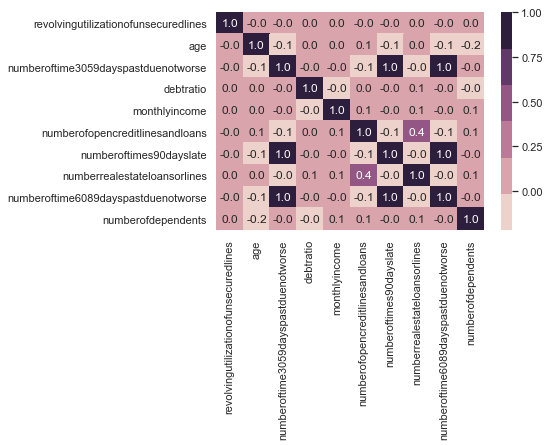

In [15]:
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt='.1f',
            cmap=(sns.cubehelix_palette()))
plt.show()

From the .describe() method we can see that the maximum values of each feature is very much higher than the mean or median values indicating outliers.
A Data point can be classified as an outlier based on various statistical properties. Here are a few methods:
- Percentile based Outlier Detection
- Median based Outlier Detection
- Standard Deviation based Outlier Detection

In [16]:
def percentile_based_outlier(data,threshold = 95):
    tail= (100-threshold)/2
    minval, maxval = np.percentile(data, [tail, 100-tail])
    
    return ((data < minval) | (data > maxval))

In [17]:
percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
149970    False
149971    False
149972    False
149973     True
149974    False
149975    False
149976    False
149977    False
149978    False
149979    False
149980    False
149981    False
149982    False
149983    False
149984    False
149985    False
149986    False
149987    False
149988    False
149989    False
149990    False
149991    False
149992    False
149993    False
149994    False
149995    False
149996    False
149997    False
149998    False
149999    False
Name: revolvingutilizati

In [18]:
def median_based_outlier(data, threshold=3.5):
    y_median = np.median(data)
    y_median_absolute_deviation = np.median([np.abs(y - y_median) for y in data])
    modified_z_scores = [0.6745 * (y - y_median) / y_median_absolute_deviation for y in data]

    return np.abs(modified_z_scores) > threshold

In [19]:
median_based_outlier(data=training_data.age)

array([False, False, False, ..., False, False, False])

In [20]:
def stand_div_based_outlier(data, threshold = 3):
    std = data.std()
    mean = data.mean()
    isoutlier = []
    for point in data:
        if point/std > threshold:
            isoutlier.append(True)
        else:
            isoutlier.append(False)
    return isoutlier

Lets define a function so that the outliers can be plotted using a distribution plot.

In [21]:
def plotoutlier(data):
    fig,axes = plt.subplots(nrows =3)
    for ax, func in zip(axes,[percentile_based_outlier, median_based_outlier, stand_div_based_outlier]):
        sns.distplot(data,ax=ax,rug=True,hist=False)
        outliers = data[func(data)]
        ax.plot(outliers, np.zeros_like(outliers),'ro',clip_on=False)
        
    kwargs = dict(y=0.95,x=0.05,ha='left',va='top',size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(data)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.show()

C:\Users\Bhavya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


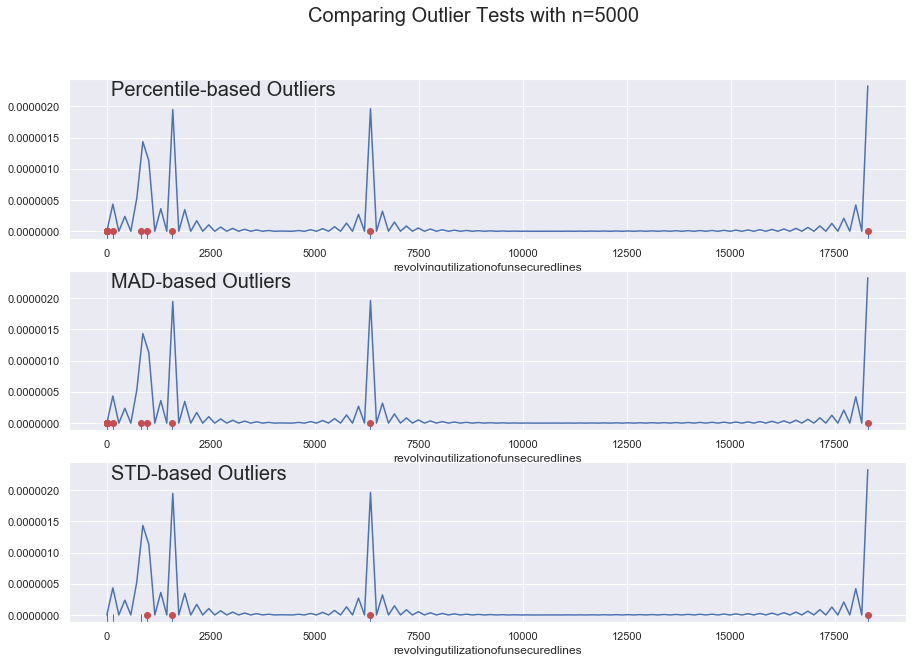

In [22]:
plotoutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

A value or threshold for an outlier definition can be decided bu looking at the counter of each value in the feature.

**Dealing with outliers:**

For each column we follow almost the same steps to deal with the outliers.
1. We first get the value counts of each value in that column using the 'Counter' function.
2. Check for thresholds or outlier values
3. Define a function which creates a new column using the selected threshold 
4. Replace the existing column with the new column.

**1. training_data.revolvingutilizationofunsecuredlines**

In [23]:
import collections
collections.Counter(training_data.revolvingutilizationofunsecuredlines)

Counter({0.7661266090000001: 1,
         0.9571510190000001: 1,
         0.65818014: 1,
         0.23380977600000002: 1,
         0.9072394: 1,
         0.21317868199999998: 1,
         0.305682465: 1,
         0.754463648: 1,
         0.116950644: 1,
         0.189169052: 1,
         0.644225962: 1,
         0.01879812: 4,
         0.010351856999999999: 1,
         0.964672555: 1,
         0.019656581: 1,
         0.548458062: 1,
         0.061086117999999995: 1,
         0.166284079: 1,
         0.22181277100000002: 1,
         0.602794411: 2,
         0.20092338199999998: 1,
         0.025655677: 1,
         0.9999998999999999: 10256,
         0.075426584: 1,
         0.04656027: 1,
         0.392248482: 1,
         0.052436094: 1,
         0.034421473: 1,
         0.45251582799999995: 1,
         0.39299458600000003: 1,
         0.704073982: 1,
         0.083418009: 1,
         0.18686855600000002: 1,
         0.6933296809999999: 1,
         0.0: 10878,
         0.881836362: 1,
   

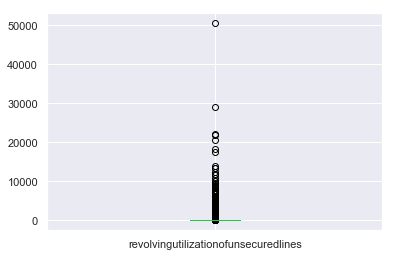

In [24]:
training_data.revolvingutilizationofunsecuredlines.plot.box()

In [25]:
after_outlier = []
for value in training_data.revolvingutilizationofunsecuredlines:
    if value <= 0.99999:
        after_outlier.append(value)
    else:
        after_outlier.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = after_outlier

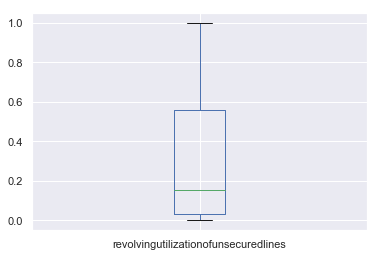

In [26]:
training_data.revolvingutilizationofunsecuredlines.plot.box()

**2. training_data.age**

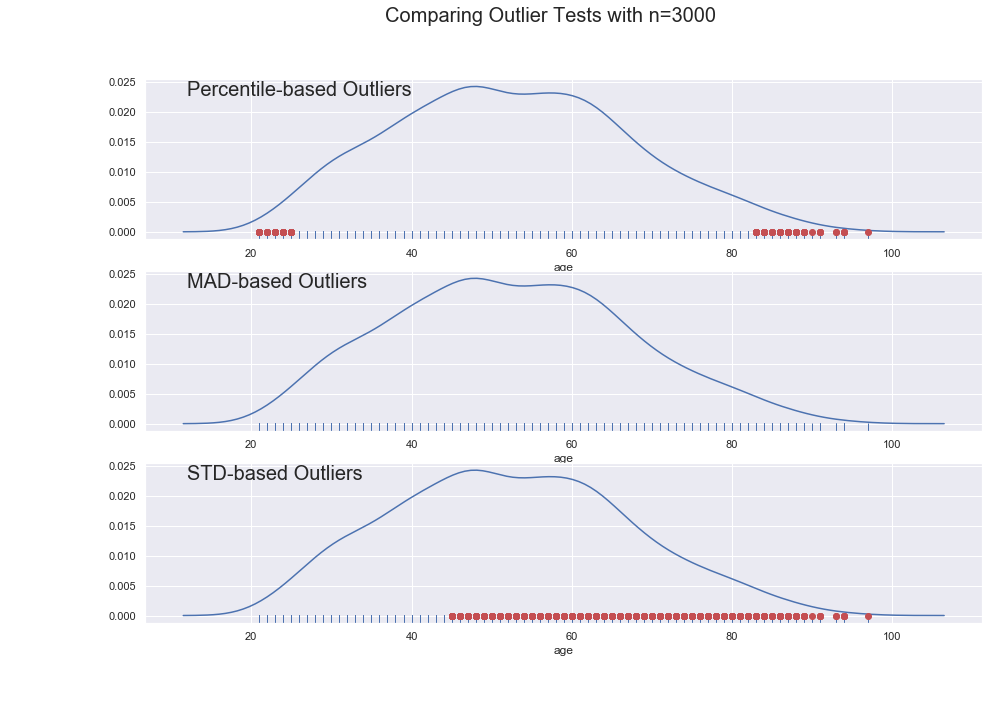

In [27]:
plotoutlier(training_data.age.sample(3000))

In [28]:
collections.Counter(training_data.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

In [29]:
training_data.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

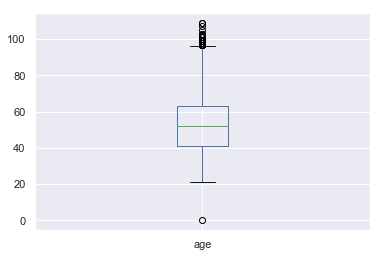

In [30]:
training_data.age.plot.box()

In [31]:
age_after_outlier = []
for value in training_data.age:
    if value > 21:
        age_after_outlier.append(value)
    else:
        age_after_outlier.append(21)
        
training_data.age = age_after_outlier

In [32]:
training_data.age.describe()

count    150000.000000
mean         52.295347
std          14.771470
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

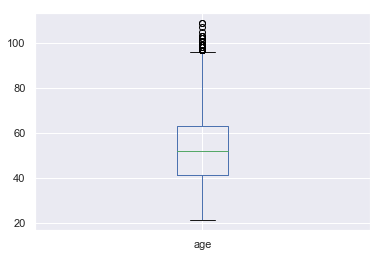

In [33]:
training_data.age.plot.box()

In [34]:
def outliers_percent(data):
    functions = [percentile_based_outlier, median_based_outlier, stand_div_based_outlier]
    outlierdict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for value in funcResult:
            if value == True:
                count += 1 
        outlierdict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierdict
outliers_percent(training_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'median_based_outlier': [31727, '21.15%'],
 'stand_div_based_outlier': [779, '0.52%']}

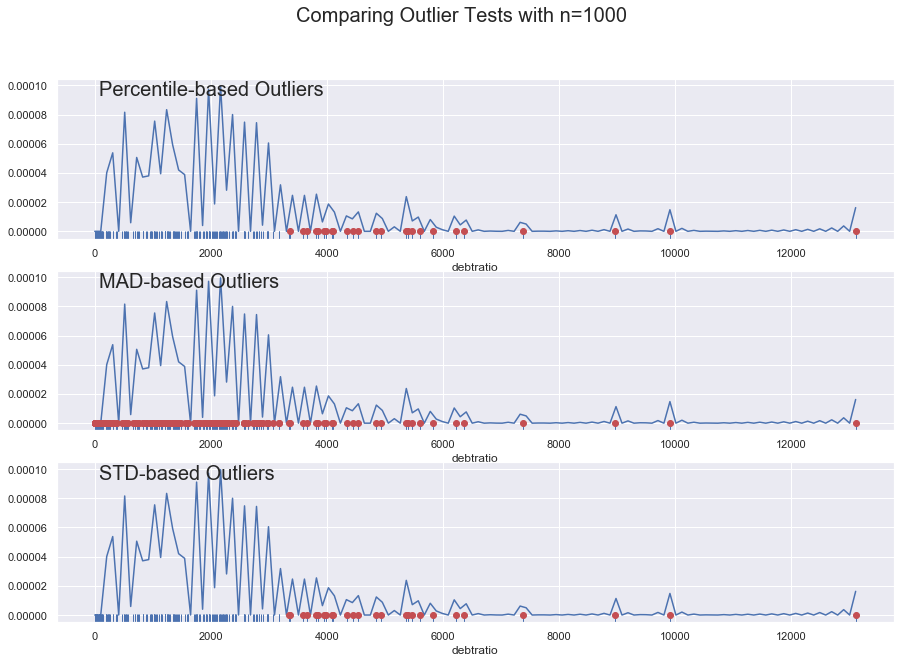

In [35]:
plotoutlier(training_data.debtratio.sample(1000))

**3. training_data.numberoftime3059dayspastduenotworse**

In [36]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [37]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

**4. training_data.debtratio**

In [38]:
minUpperBound = min([val for (val, out) in 
                     zip(training_data.debtratio, median_based_outlier(training_data.debtratio)) if out == True])

In [39]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio

**5. training_data.monthlyincome**

In [40]:
def replaceOutlier(data, method = stand_div_based_outlier, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = stand_div_based_outlier(data)
    x = pd.DataFrame({'debt':data, 'outlier':vote})
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [41]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')
training_data.monthlyincome = incomeNew

**6. training_data.numberoftimes90dayslate**

In [42]:
collections.Counter(training_data.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [43]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [44]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new

**7. training_data.numberrealestateloansorlines**

In [45]:
collections.Counter(training_data.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [46]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

**8. training_data.numberoftime6089dayspastduenotworse**

In [47]:
collections.Counter(training_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [48]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new

**9. training_data.numberofdependents**

In [49]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [50]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [51]:
training_data.numberofdependents = depNew

In [52]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0.024926,38900.0,7,0.0,1,0.0,0.0


### Feature Importance
Here, the importance of a feature in a model is found using the RandomForestClassifier. 

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
X = training_data.drop('seriousdlqin2yrs', axis = 1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state=0, n_jobs =1)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
indices

array([0, 3, 4, 1, 5, 6, 2, 8, 9, 7], dtype=int64)

In [56]:
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[indices[i]],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.188540
 2) debtratio                      0.154247
 3) monthlyincome                  0.152813
 4) age                            0.141276
 5) numberofopencreditlinesandloans 0.098071
 6) numberoftimes90dayslate        0.087938
 7) numberoftime3059dayspastduenotworse 0.050489
 8) numberoftime6089dayspastduenotworse 0.045925
 9) numberofdependents             0.044204
10) numberrealestateloansorlines   0.036498


This gives us how importance each feature is in predicting the credit risk.

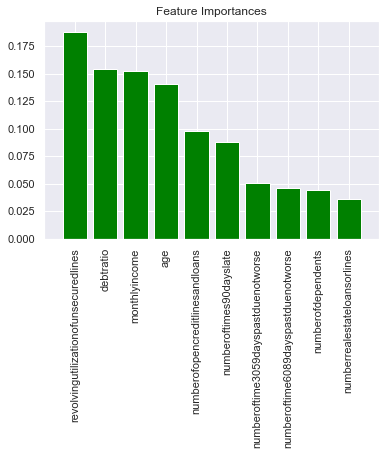

In [57]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Feature Modeling

The following Machine Learning Algorithms will be used to model the data:
- Logistic Regression
- K Nearest Neighbor Classifier
- AdaBoost Classifier
- Gradient Boosting Classifier
- Random Forest Classifier

We initailly split the dataset into training and testing data. 
For each model we create a model object, fit the training data and calculate the ROC accuracy score using the testing data.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Logistic Regression**

In [60]:
lmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
lmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=2, warm_start=False)

In [61]:
lmMod.score(X_test, y_test)

0.9364533333333334

In [62]:
test_labels =lmMod.predict_proba(np.array(X_test.values))[:,1]

print(test_labels)

[0.019301   0.16248997 0.02787564 ... 0.10553273 0.06471129 0.147775  ]


In [63]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8418232096249478

**K Nearest Neighbor Classifier**

In [64]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
knMod.score(X_test, y_test)

0.9313866666666667

In [66]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.590258469422767

**AdaBoost Classifier**

In [67]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [68]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [69]:
adaMod.score(X_test, y_test)

0.9354933333333333

In [70]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8527084386205568

**Gradient Boosting Classifier**

In [71]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
gbMod.score(X_test, y_test)

0.9366666666666666

In [73]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8527084386205568

**Random Forest Classifier**

In [74]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [75]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
rfMod.score(X_test, y_test)

0.9339466666666667

In [77]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7802515318607341

### K-Fold Cross Validation and Optimising the hyper parameters

**K-fold Cross Validation**

This is done to make sure the score is not biased because of the spliting of the data.

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [80]:
cvDict = cvDictGen(functions=[knMod, lmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvDict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s finished


{'KNeighborsClassifier': [0.5939900230598207, 0.0017712503839307878],
 'LogisticRegression': [0.8488884520514048, 0.003395027464742639],
 'AdaBoostClassifier': [0.858608168711411, 0.0022015280626144634],
 'GradientBoostingClassifier': [0.8639698351489564, 0.0026917021623800146],
 'RandomForestClassifier': [0.7788445044392653, 0.0030997882514200363]}

**AdaBoost Classifier** and **Gradient Boosting Classifier** seem to have the highest accuracy score among the other classifiers.

**Optimising the hyper parameters**

To obtain the best hyper parameters for the above selected classifiers we use RandomizedSearchCV.

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

**AdaBoost Classifier**

In [82]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.5s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   5.7s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   5.7s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.7min finished


In [83]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8603608887582948)

**Gradient Boosting Classifier**

In [86]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [87]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=exponential, max_depth=5, n_estimators=432 .................
[CV] .. loss=exponential, max_depth=5, n_estimators=432, total=  44.9s
[CV] loss=exponential, max_depth=5, n_estimators=432 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.6s remaining:    0.0s


[CV] .. loss=exponential, max_depth=5, n_estimators=432, total=  41.3s
[CV] loss=exponential, max_depth=5, n_estimators=432 .................
[CV] .. loss=exponential, max_depth=5, n_estimators=432, total=  42.5s
[CV] loss=deviance, max_depth=6, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=6, n_estimators=20, total=   3.0s
[CV] loss=deviance, max_depth=6, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=6, n_estimators=20, total=   3.0s
[CV] loss=deviance, max_depth=6, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=6, n_estimators=20, total=   3.1s
[CV] loss=exponential, max_depth=8, n_estimators=70 ..................
[CV] ... loss=exponential, max_depth=8, n_estimators=70, total=  21.1s
[CV] loss=exponential, max_depth=8, n_estimators=70 ..................
[CV] ... loss=exponential, max_depth=8, n_estimators=70, total=  23.6s
[CV] loss=exponential, max_depth=8, n_estimators=70 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 29.7min finished


In [88]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 3, 'n_estimators': 205},
 0.8649066343954104)

Using these best hyper parameters, let's create two classifier functions.

In [89]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [90]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [91]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

cvDictbestpara

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.7s finished


{'GradientBoostingClassifier': [0.8642295553907665, 0.0029192315761639547],
 'AdaBoostClassifier': [0.859134090966241, 0.002620515961562486]}

In [92]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8587382344946104

In [93]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8530406574134237

**Feature Transformation**

To aviod skewed results, the features can be transformed using a logarithmic function.

In [94]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [95]:
transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [96]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [97]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],scr='roc_auc')
cvDictbestpara_transform

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.8s finished


{'GradientBoostingClassifier': [0.8642320531836166, 0.0029190344670444023],
 'AdaBoostClassifier': [0.859134090966241, 0.002620515961562486]}

In [98]:
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [99]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8587423935678349

In [100]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8530256049867675

In [101]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)],
                             voting='soft',weights=[2,1]).fit(X_train_transform, y_train)


In [102]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]
votingMod.score(X_test_transform, y_test)

0.9370933333333333

In [103]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.858729323822661

In [104]:
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1]).fit(X_train, y_train)
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8587338817111261

**Out-of-sample Testing**

In [105]:
testing_data = pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Credit-Risk-Modelling/data/cs-test.csv').drop('Unnamed: 0', axis = 1)

cleancolumn = []
for i in range(len(testing_data.columns)):
    cleancolumn.append(testing_data.columns[i].replace('-', '').lower())
testing_data.columns = cleancolumn

testing_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
testing_data.fillna((training_data.median()), inplace=True)
testing_data.head()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [106]:
testing_data.shape

(101503, 10)

In [108]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(testing_data.values))
print ((test_labels_votingMod_old))

[[0.78950401 0.21049599]
 [0.80003456 0.19996544]
 [0.82966633 0.17033367]
 ...
 [0.83526998 0.16473002]
 [0.7840066  0.2159934 ]
 [0.81179752 0.18820248]]


In [109]:
output_votingmod_old = pd.DataFrame({'ID':testing_data.index, 'probability':test_labels_votingMod_old[:,1]})
output_votingmod_old.set_index('ID', inplace = True)

This dataframe (features not transformed) gives the probability the payment of a borrower's loan is delayed.

In [110]:
output_votingmod_old.head()

,probability
ID,
0,0.210496
1,0.199965
2,0.170334
3,0.216491
4,0.249253


In [112]:
testing_data_temp = np.array(testing_data)
testing_data_transform = transformer.transform(testing_data_temp)
testing_labels_votingMod = votingMod.predict_proba(np.array(testing_data.values))
print ((testing_labels_votingMod))

C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


[[0.17572111 0.82427889]
 [0.17484416 0.82515584]
 [0.19544144 0.80455856]
 ...
 [0.34925683 0.65074317]
 [0.17075517 0.82924483]
 [0.17628813 0.82371187]]


This dataframe (features transformed) gives the probability the payment of a borrower's loan is delayed.

In [114]:
output_votingmod = pd.DataFrame({'ID':testing_data.index, 'probability':testing_labels_votingMod[:,0]})
output_votingmod.set_index('ID', inplace = True)

In [115]:
output_votingmod.head()

,probability
ID,
0,0.175721
1,0.174844
2,0.195441
3,0.166029
4,0.175128
